# **Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

## **Edición 2023**


## Análisis exploratorio y curación de datos

### Trabajo práctico entregable - Grupo 22 - Parte 2

**Integrantes:**
- Chevallier-Boutell, Ignacio José
- Ribetto, Federico Daniel
- Rosa, Santiago
- Spano, Marcelo

**Seguimiento:** Meinardi, Vanesa

---

## Librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None  # default='warn'

import seaborn as sns
sns.set_context('talk')
sns.set_theme(style='white')

from sklearn.preprocessing import OneHotEncoder
import missingno as msno

from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()
robust = RobustScaler()

def normalizer(data):
    Media = data.mean()
    SD = data.std()
    normData = (data - Media) / SD

    return normData, Media, SD

def denormalizer(data, m, s):
    return data * s + m

## Acerca del dataset

En la parte 1 del entregable se seleccionaron aquellas filas y columnas que consideramos relevantes para el problema de predicción de los precios de las propiedades en Melbourn, Australia. Utilizaremos dicho conjunto de datos resultante.

In [2]:
df = pd.read_csv('GuardadoFinal.csv').iloc[:, 1:]
df[:3]

,Distance,Lattitude,Longtitude,YearBuilt,Landsize,...,airbnb_number_of_reviews_sum,airbnb_number_of_reviews_mean,airbnb_review_scores_rating_min,airbnb_review_scores_rating_max,airbnb_review_scores_rating_mean
0,2.5,-37.7996,144.9984,NaN,202.0,...,4029.0,15.616279,20.0,100.0,95.288462
1,2.5,-37.8079,144.9934,1900.0,156.0,...,4029.0,15.616279,20.0,100.0,95.288462
2,2.5,-37.8093,144.9944,1900.0,134.0,...,4029.0,15.616279,20.0,100.0,95.288462


---
# Ejercicio 1 - Encoding

En la mayoría de los modelos de machine learning es necesario que las variables que se utilizan para entrenarlo sean del tipo numéricas. Por este motivo, suele ser necesario encontrar algún mapeo útil que permita transformar a las variables categóricas en numéricas.

En este caso, las variables categóricas que consideramos importantes para la predicción del precio de las casas son CouncilArea, Regionname, SellerG y Type. Las 4 son variables nominales ya que no tienen un orden en sus categorías. En este sentido, consideramos que el algoritmo one-hot encoding es útil para realizar su codificación. El mismo crea una ristra de números con tantas cifras como categorías posea la variable considerada: cuando el registro pertenece a una dada categoría, se genera un 1 en dicha posición, siendo el resto de las cifras iguales a cero.

Vamos a comenzar el proceso de codificación separando entre variables categóricas y numéricas, según lo antes mencionado. Luego, vemos la cantidad de categorías que posee cada una de las variables categóricas elegidas y el número de columnas que se creará en total luego de realizar la codificación one-hot: mapearemos las 4 columnas categóricas en 41 columnas numéricas.

In [3]:
categorical_cols = ['CouncilArea', 'Regionname', 'SellerG', 'Type']
numerical_cols = [x for x in df.columns if (x not in categorical_cols) and x not in ['Postcode', 'zipcode']]

print('Cantidad de categorías para cada variable:')
print(df[categorical_cols].nunique())
print('')
print('Cantidad de columnas que se creará con One Hot Encoding:', df[categorical_cols].nunique().sum())

Cantidad de categorías para cada variable:
CouncilArea    18
Regionname      8
SellerG        12
Type            3
dtype: int64

Cantidad de columnas que se creará con One Hot Encoding: 41


Antes de pasar a la codificación, corroboramos la presencia de datos faltantes utilizando la librería `missingno`. En el gráfico de barras vemos que en CouncilArea faltan 1355 datos, representando el 10% del total de registros. Estos registros recibirán una categoría propia dentro de esta variable cuando hagamos la codificación one-hot.

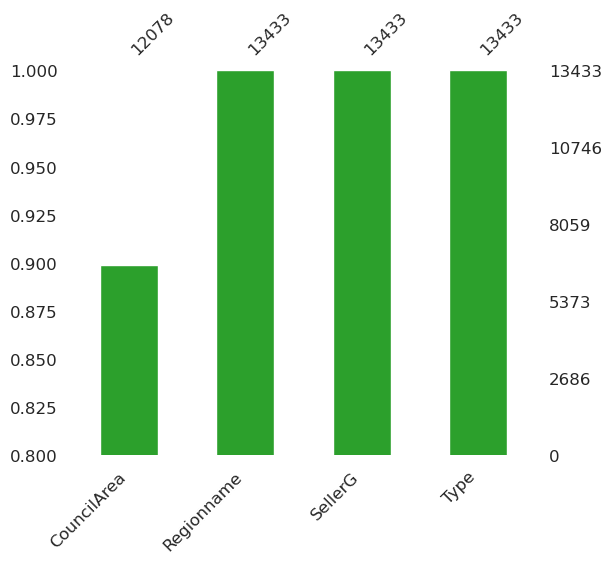

In [4]:
fig, axs = plt.subplots(figsize=(6, 5))
msno.bar(df[categorical_cols], sort="ascending", fontsize=12, color="tab:green", ax=axs)
axs.set_ylim(0.8, 1)
plt.show()

A continuación utilizamos la función OneHotEncoder de sklearn para realizar el One Hot Encoding de las variables. En el código se describe el paso a paso, pero la idea final es crear un nuevo DataFrame de Pandas con las nuevas columnas antes dichas.

In [5]:
# Nos quedamos con la columnas categóricas del DataFrame
features = df[categorical_cols]
# Creamos una lista con las categorías de cada variable categórica
categories = [features[column].unique() for column in features.columns]
# Inicializamos el enconder
encoder = OneHotEncoder(categories=categories)
# Mapeamos las categóricas a one-hot
encoded_features = encoder.fit_transform(features)

# Creación de nuevas columnas para one-hot
feature_names = []
for i, column in enumerate(features.columns):
    for category in categories[i]:
        feature_names.append(f'{column}_{category}')

encoded_df = pd.DataFrame(encoded_features.toarray(), columns=feature_names)
encoded_df.sample(10).T

,2690,45,2608,8567,8869,1795,8700,11511,9285,1179
CouncilArea_Yarra,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CouncilArea_Moonee Valley,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CouncilArea_Port Phillip,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
CouncilArea_Darebin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CouncilArea_Hobsons Bay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CouncilArea_Stonnington,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CouncilArea_Boroondara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CouncilArea_Monash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
CouncilArea_Glen Eira,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
CouncilArea_Whitehorse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Para finalizar este punto, unimos las variables numéricas originales con las categóricas codificadas.

In [6]:
new_df = pd.concat([encoded_df, df[numerical_cols]], axis=1)

new_df.sample(5).T

,8756,3493,12793,305,477
CouncilArea_Yarra,0.00000,0.000000,0.000000e+00,0.000000,0.0000
CouncilArea_Moonee Valley,0.00000,0.000000,0.000000e+00,1.000000,1.0000
CouncilArea_Port Phillip,0.00000,0.000000,0.000000e+00,0.000000,0.0000
CouncilArea_Darebin,0.00000,0.000000,0.000000e+00,0.000000,0.0000
CouncilArea_Hobsons Bay,0.00000,0.000000,0.000000e+00,0.000000,0.0000
CouncilArea_Stonnington,0.00000,0.000000,0.000000e+00,0.000000,0.0000
CouncilArea_Boroondara,0.00000,0.000000,0.000000e+00,0.000000,0.0000
CouncilArea_Monash,0.00000,0.000000,0.000000e+00,0.000000,0.0000
CouncilArea_Glen Eira,0.00000,0.000000,0.000000e+00,0.000000,0.0000
CouncilArea_Whitehorse,0.00000,0.000000,0.000000e+00,0.000000,0.0000


---
# Ejercicio 2 - Imputación por KNN

## Análisis preliminar con `missingno`

En este ejercicio trabajaremos sobre las variables numéricas, imputando de alguna manera en aquellos registros donde tengamos valores faltantes. Para empezar, creamos un DataFrame conteniendo las columnas de interés (todas menos aquellas que tienen información de AirBnB) y analizamos con `missingno`.

A partir del gráfico de barras vemos que YearBuilt y BuildingArea presentan datos faltantes (faltan el 40% y el 48%, respectivamnete). Luego, como el nuevo DataFrame está ordenado en función de BuildingArea, el gráfico de matriz nos muestra que hay una gran correlación entre los datos faltantes en estas 2 categorías bajo análisis: la gran mayoría de datos faltantes en YearBuilt se corresponden con datos faltantes en BuildingArea. Esta idea queda clara cuando pasamos al mapa de calor, el cual mide la correlación de nulidad: qué tan fuerte la presencia (o ausencia) de una variable afecta la presencia de otra. Las variables que están completamente llenas o completamente vacías no presentan correlación significativa, así que quedan automáticamente descartadas de la gráfica. Además, la gráfica sólo completa las correlaciones en la triangular inferior. La gráfica nos da un valor de 0.8, lo cual se interpreta de la siguiente manera: es altamente probable que cada vez que un registro tiene un valor no nulo en YearBuilt también tenga un valor no nulo BuildingArea.

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

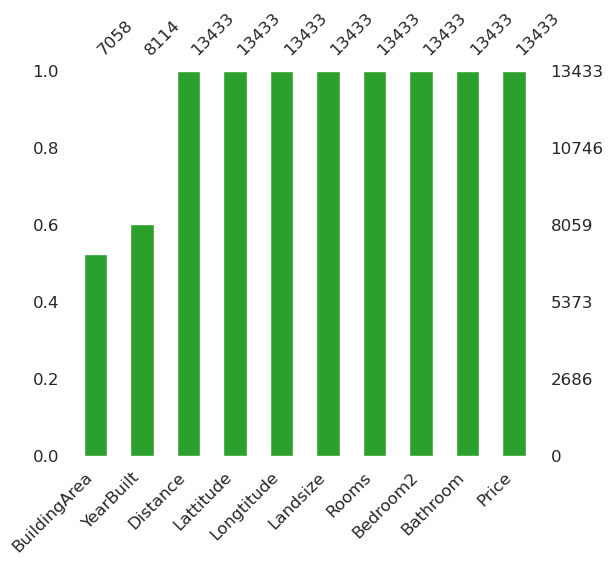

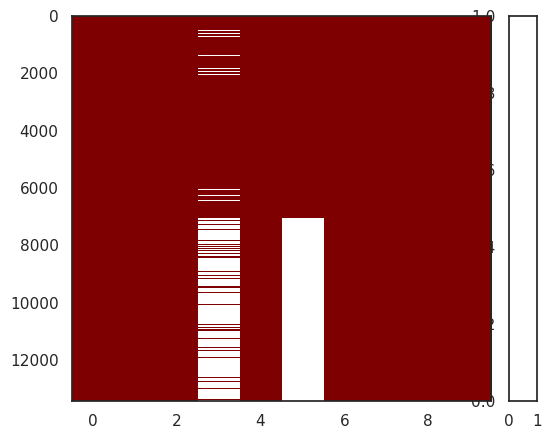

In [56]:
numcol_airless = [x for x in numerical_cols if (x.split('_')[0] != 'airbnb')]
df_airless = new_df[numcol_airless].sort_values('BuildingArea')

msno.bar(df_airless, sort="ascending", fontsize=12, color="tab:green", figsize=(6, 5))
msno.matrix(df_airless, fontsize=12, color=[0.5,0,0], figsize=(6, 5))
msno.heatmap(df_airless, fontsize=12, figsize=(6, 5))

plt.show()

## Primeras pruebas con el imputador

Ahora que sabemos dónde hay datos faltantes y sus posibles conexiones, vamos a pasar al tratamiento de los mismos, inclinándonos por el camino de la imputación. La técnica de imputación a utilizar se clasifica como avanzada, ya que reemplazaremos los datos faltantes por algún valor sustituto, estimado por un algortimo de  aprendizaje automático.

Particularmente, utilizaremos la imputación iterativa de sklearn (`IterativeImputer`), basada en la imputación múltiple por ecuaciones encadenadas (MICE): el imputador modela cada variable con valores faltantes como una función de las otras variables, a partir de las cuales estima la imputación. La iteración la hace de manera rotatoria, generando un todos-vs-todos: en cada paso, una columna es designada como output *y*, mientras que las otras columnas son tratadas como input $X$, sobre las cuales se ajusta un regresor (`estimator`) sobre las *y* conocidas para poder después predecir los valores faltantes en *y*. Esta predicción se realiza mediante regresiones múltiples sobre una muestra aleatoria de los datos y, luego, toma el promedio de los valores de regresión múltiple y usa ese valor para imputar el valor faltante. Este tipo de imputación funciona llenando los datos faltantes varias veces: todo el proceso se repite para cada variable durante `max_iter` rondas, siendo las salidas de la última ronda de iteración los resultados finales del proceso.

El regresor a utilizar será `KNeighborsRegressor`, el cual se basa en el algoritmo de k vecinos más próximos (KNN): se basa en la *similitud de características* para predecir los valores de cualquier nuevo punto de datos. Esto significa que al nuevo punto se le asigna un valor en función de su parecido con los puntos del conjunto de entrenamiento, siendo muy útil para hacer predicciones sobre valores faltantes al encontrar los k-vecinos más cercanos a la observación con datos perdidos, para luego luego imputarlos en función de los valores no perdidos en el *vecindario*. Observamos que utilizar `IterativeImputer` con el regresor `KNeighborsRegressor` **no** es equivalente a utilizar el imputador `KNNImputer` (también de sklearn): aunque ambos están basados en KNN, uno es un imputador en sí mismo y otro es un regresor utilizado por otro imputador. En otros términos, `KNeighborsRegressor` es el método de predicción de valores faltantes, mientras que `KNNImputer` es el método de reemplazo de valores faltantes.

En ambas estrategias de imputación hay que realizar encoding para terminar teniendo sólo variables numéricas. Además, es necesario realizar una estandarización, ya que datos con diferentes escalas se introducen valores de reemplazo sesgados. Puntualmente, el imputador iterativo asume una distribución Gaussiana sobre las variables de salida, por lo que las características deberían ser normales, o ser transformadas para hacerlas lo más normales posibles, mejorando así el desempeño del imputador. Si bien el `KNNImputer` es rápido y fácil, no es muy preciso ni tiene cómputo para el error. Por su parte, `IterativeImputer` es mucho más versátil, ya que puede utilizarse con diferentes tipos de regresores. Asimismo, las imputaciones múltiples son mucho mejores que una única imputación (como con `KNNImputer`), ya que mide la incertidumbre de los valores perdidos de una mejor manera.

Una útima consideración antes de instanciar el imputador es que el `IterativeImputer` es sensible a la tolerancia, la cual a su vez está relacionada al regresor a utilizar. El valor de tolerancia por defecto es de 1e-3, pero la documentación recomienda usar una tolerancia del orden de 1e-2 cuando el regresor es `KNeighborsRegressor`. Comenzamos usando `max_iter=10` con `tol=5e-2` y resultó convergente para el caso sin escalear. Sin embargo, para poder converger cuando se tenía en cuenta el reescaleo tuvimos que relajar las tolerancia y extender las iteraciones, sino caíamos siempre en un `early stopping`. La única manera en que todos los casos fueran simultáneamente convergentes bajo el mismo imputador fue usando `max_iter=50` con `tol=2e-1`. Consideramos que esta no es la mejor situación ya que habrá casos donde estamos llegando a una solución subóptima. Decidimos entonces generar imputadores _ad hoc_.

In [11]:
# Instanciamos el IterativeImputer con un estimador `KNeighborsRegressor`
mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), max_iter=10, 
                                tol=5e-2, random_state=0)

Probamos el imputador con los datos *crudos*, *i.e.* sin ningún tipo de pretratamiento.

In [57]:
mice_knn = df_airless.copy(deep=True)
mice_knn[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(mice_knn[['YearBuilt', 'BuildingArea']])

Al ver el gráfico de barras de `missingno`, tenemos que efectivamente los valores faltantes han sido imputados por algún otro valor. Los histogramas nos indican qué valores han tomado las imputaciones nuevas.

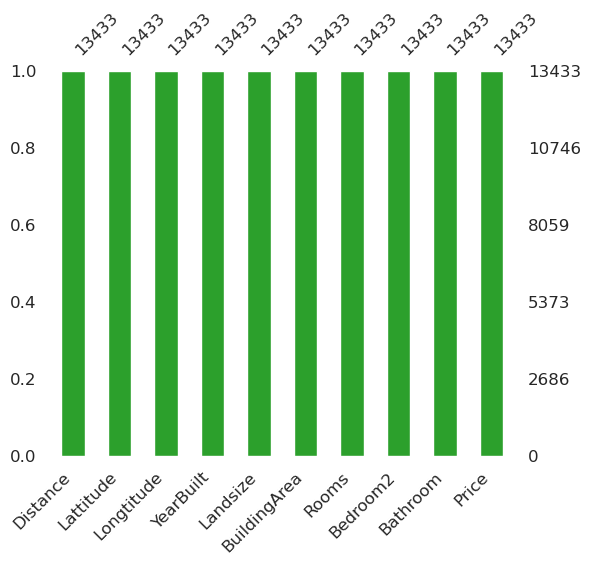

In [13]:
msno.bar(mice_knn, sort="ascending", fontsize=12, color="tab:green", figsize=(6, 5))
plt.show()

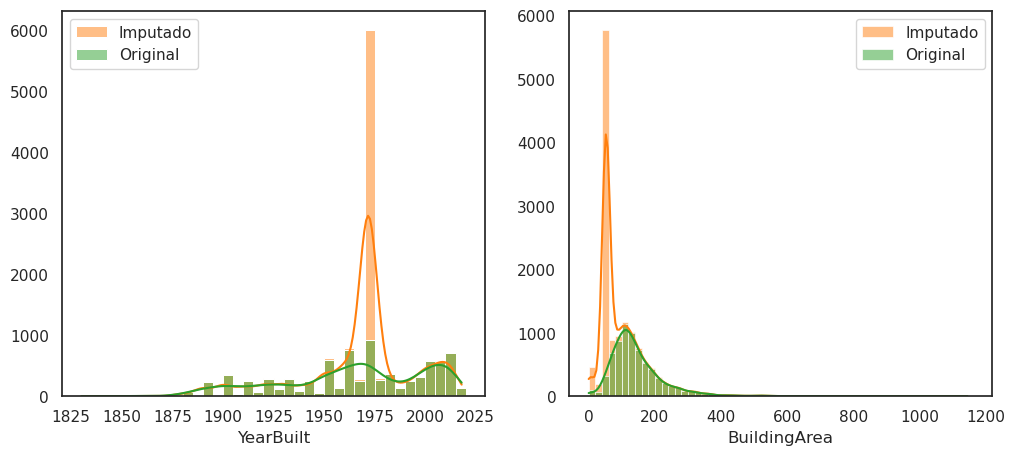

In [14]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.histplot(mice_knn['YearBuilt'], ax=axs[0], binwidth=5, color='tab:orange', label='Imputado', kde=True)
sns.histplot(df_airless['YearBuilt'], ax=axs[0], binwidth=5, color='tab:green', label='Original', kde=True)
axs[0].set_ylabel("")
axs[0].legend()

sns.histplot(mice_knn['BuildingArea'], ax=axs[1], binwidth=20, color='tab:orange', label='Imputado', kde=True)
sns.histplot(df_airless['BuildingArea'], ax=axs[1], binwidth=20, color='tab:green', label='Original', kde=True)
axs[1].set_ylabel("")
axs[1].legend()

plt.show()

## Comparación de escaleos

Vamos a evaluar el desempeño del imputador frente a diferentes tipos de escaleo:
* Normalización (`normalizer`): restar la media y dividir por la desviación estándar.
* Escaleo simple (`MinMaxScaler`): escalea los valores al rango [0, 1].
* Escaleo robusto (`RobustScaler`): similar al anterior, pero usando estadística. Así es más robusto a *outliers*.

Generamos entonces las imputaciones en función de cada escaleo.

In [15]:
mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), max_iter=40, 
                                tol=1e-1, random_state=0)


Media, SD = [], []
# Creamos un nuevo DataFrame
mice_knn_norm = df_airless.copy(deep=True)

# Normalizamos
mice_knn_norm['YearBuilt'], m, s = normalizer(mice_knn_norm['YearBuilt'])
Media.append(m)
SD.append(s)
mice_knn_norm['BuildingArea'], m, s = normalizer(mice_knn_norm['BuildingArea'])
Media.append(m)
SD.append(s)

# Imputamos
mice_knn_norm[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(mice_knn_norm[['YearBuilt', 'BuildingArea']])

# Revertimos la normalización
mice_knn_norm['YearBuilt'] = denormalizer(mice_knn_norm['YearBuilt'], Media[0], SD[0])
mice_knn_norm['BuildingArea'] = denormalizer(mice_knn_norm['BuildingArea'], Media[1], SD[1])


/home/santiago/anaconda3/lib/python3.9/site-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [16]:
mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), max_iter=50, 
                                tol=2e-1, random_state=0)


# Creamos un nuevo DataFrame
mice_knn_sca = df_airless.copy(deep=True)
# Escaleamos
mice_knn_sca[['YearBuilt','BuildingArea']] = scaler.fit_transform(mice_knn_sca[['YearBuilt', 'BuildingArea']])
# Imputamos
mice_knn_sca[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(mice_knn_sca[['YearBuilt', 'BuildingArea']])
# Revertimos la transformación
mice_knn_sca[['YearBuilt','BuildingArea']] = scaler.inverse_transform(mice_knn_sca[['YearBuilt', 'BuildingArea']])

In [54]:
#original:
mice_imputer = IterativeImputer(estimator=KNeighborsRegressor(), max_iter=40, 
                                tol=1e-1, random_state=0)

# Creamos un nuevo DataFrame
mice_knn_rob = df_airless.copy(deep=True)
# Escaleamos
mice_knn_rob[['YearBuilt','BuildingArea']] = robust.fit_transform(mice_knn_rob[['YearBuilt', 'BuildingArea']])
# Imputamos
mice_knn_rob[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(mice_knn_rob[['YearBuilt', 'BuildingArea']])
# Revertimos la transformación
mice_knn_rob[['YearBuilt','BuildingArea']] = robust.inverse_transform(mice_knn_rob[['YearBuilt', 'BuildingArea']])

Ahora comparamos los resultados entre el conjunto de datos original (`Original`), los datos imputados en crudo (`Imputado`) y los datos imputados luego de escalear con el escaleo simple (`Escaleado`), el escaleo robusto (`Robusto`) y la normalización (`Norm`).

Observamos que, efectivamente, es necesario el escaleo previo, ya que la respuesta de la imputación cambia al hacerlo. Más aún: la respuesta cambia en función del escaleo que hayamos elegido. Particularmente:
* El imputado crudo y el escaleado simple arrojan resultados similares, siendo que el escaleado requiere 5 veces más iteraciones y una tolerancia 4 veces mayor.
* El escaleado robusto y el normalizado otorgan resultados similares, requieriendo la misma cantidad de iteraciones y tolerancia entre sí, siendo 4 veces más iteraciones respecto al crudo y una tolerancia 2 veces mayor.

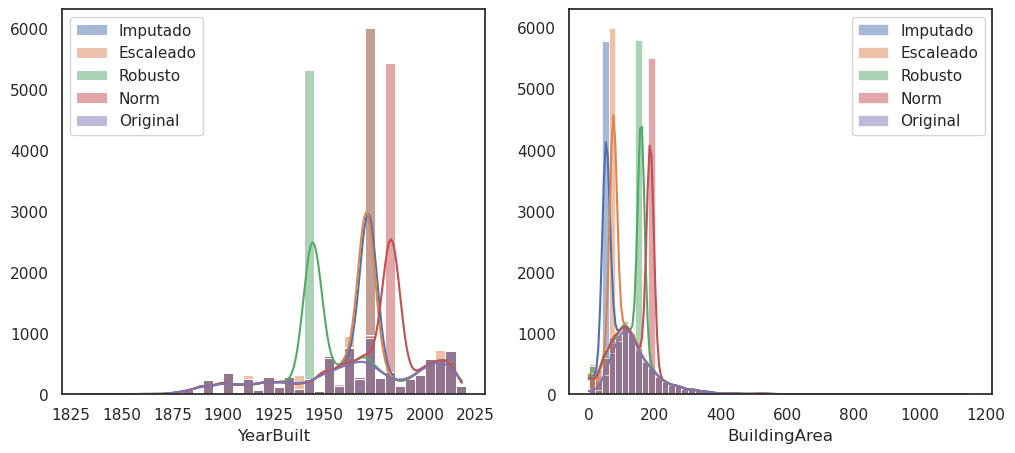

In [39]:
fig, axs = plt.subplots(1,2, figsize=(12,5))

sns.histplot(mice_knn['YearBuilt'], ax=axs[0], label='Imputado', binwidth=5, kde=True)
sns.histplot(mice_knn_sca['YearBuilt'], ax=axs[0], label='Escaleado', binwidth=5, kde=True)
sns.histplot(mice_knn_rob['YearBuilt'], ax=axs[0], label='Robusto', binwidth=5, kde=True)
sns.histplot(mice_knn_norm['YearBuilt'], ax=axs[0], label='Norm', binwidth=5, kde=True)
sns.histplot(df_airless['YearBuilt'], ax=axs[0], label='Original', binwidth=5, kde=True)
axs[0].set_ylabel("")
axs[0].legend()

sns.histplot(mice_knn['BuildingArea'], ax=axs[1], label='Imputado', binwidth=20, kde=True)
sns.histplot(mice_knn_sca['BuildingArea'], ax=axs[1], label='Escaleado', binwidth=20, kde=True)
sns.histplot(mice_knn_rob['BuildingArea'], ax=axs[1], label='Robusto', binwidth=20, kde=True)
sns.histplot(mice_knn_norm['BuildingArea'], ax=axs[1], label='Norm', binwidth=20, kde=True)
sns.histplot(df_airless['BuildingArea'], ax=axs[1], label='Original', binwidth=20, kde=True)
axs[1].set_ylabel("")
axs[1].legend()

plt.show()

## Conclusión

A partir de todo lo dicho creemos que sí es necesario hacer un escaleo previo a la imputación. Entre los métodos probados, nos inclinamos por el escaleo robusto aprovechando su robustez frente a *outliers* y el hecho de que sea una función ya implementada y estudiada por sklearn.

---
# Ejercicio 3 - Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

---
# Ejercicio 4 - Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

---
# Ejercicio 5 - Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
